In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [14]:
df_fake = pd.read_csv(r"C:\Users\kalyan nagu\OneDrive\Desktop\hello\Fake.csv")
df_true = pd.read_csv(r"C:\Users\kalyan nagu\OneDrive\Desktop\hello\True.csv")



In [15]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [16]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [17]:
df_fake["class"] = 0
df_true["class"] = 1

In [18]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [19]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [20]:
df_merge.shape

(44898, 5)

In [21]:
df_merge.describe()

,class
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [22]:
df_merge.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

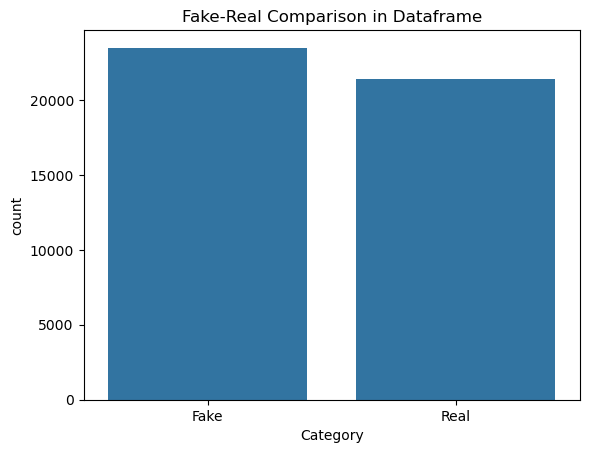

In [23]:
sns.countplot(x="class",
              data=df_merge)

plt.title("Fake-Real Comparison in Dataframe")
plt.xlabel("Category")
plt.xticks([0, 1], ["Fake", "Real"])
plt.show()


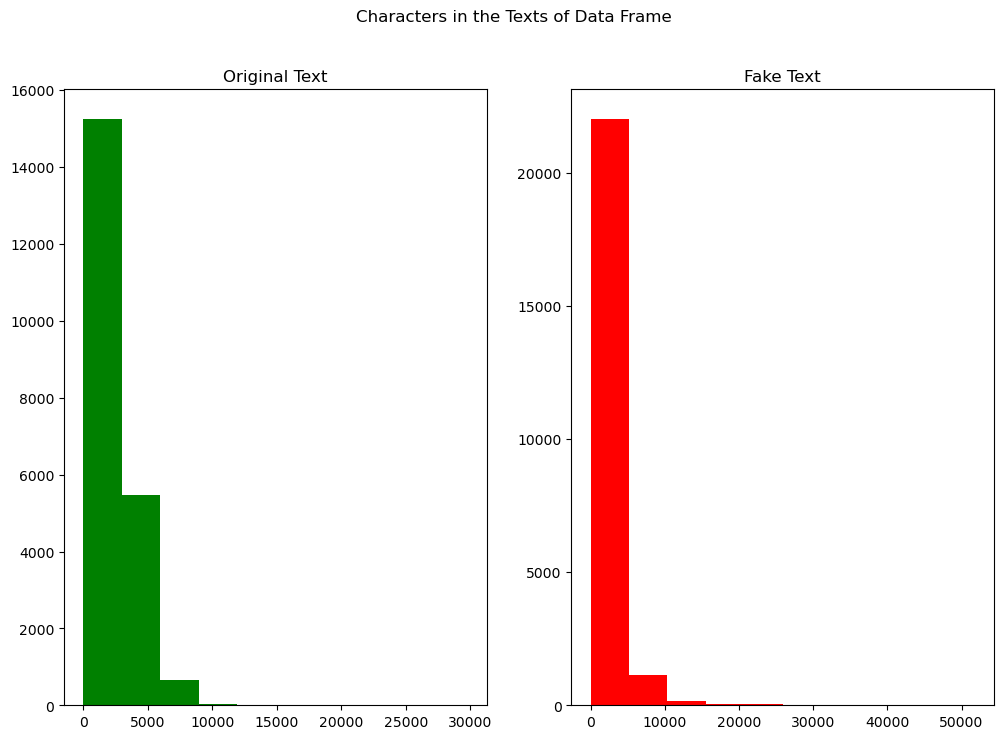

In [24]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len = df_merge[df_merge["class"] == 1]["text"].str.len()
ax1.hist(text_len, color='green')
ax1.set_title('Original Text')

text_len = df_merge[df_merge["class"] == 0]["text"].str.len()
ax2.hist(text_len, color="red")
ax2.set_title("Fake Text")

fig.suptitle("Characters in the Texts of Data Frame")
plt.show()

In [25]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [26]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [27]:
df = df.sample(frac = 1)

In [28]:
df.head()

,text,class
10590,Fox News Channel s Jeanine Pirro went after th...,0
19691,HONG KONG (Reuters) - Hong Kong s leader urged...,1
1258,The latest results are in and things are looki...,0
415,(Reuters) - U.S. President Donald Trump has ag...,1
7687,(Reuters) - U.S. Democratic presidential candi...,1


In [29]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [30]:
df.columns

Index(['text', 'class'], dtype='object')

In [31]:
df.head()

,text,class
0,Fox News Channel s Jeanine Pirro went after th...,0
1,HONG KONG (Reuters) - Hong Kong s leader urged...,1
2,The latest results are in and things are looki...,0
3,(Reuters) - U.S. President Donald Trump has ag...,1
4,(Reuters) - U.S. Democratic presidential candi...,1


In [32]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [33]:
df["text"] = df["text"].apply(wordopt)

In [34]:
x = df["text"]
y = df["class"]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [38]:
xv_train.shape,y_train.shape

((33673, 95105), (33673,))

In [39]:
pred_lr=LR.predict(xv_test)

In [40]:
LR.score(xv_test, y_test)

0.9894877505567928

In [41]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5837
           1       0.99      0.99      0.99      5388

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [42]:
#Decision Tree Classification

In [43]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [44]:
xv_train.shape,y_train.shape

((33673, 95105), (33673,))

In [45]:
pred_dt = DT.predict(xv_test)

In [46]:
DT.score(xv_test, y_test)

0.9955456570155902

In [47]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5837
           1       1.00      0.99      1.00      5388

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [48]:
#Random Forest Classifier¶

In [49]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
xv_train.shape,y_train.shape

((33673, 95105), (33673,))

In [51]:
pred_rfc = RFC.predict(xv_test)

In [52]:
RFC.score(xv_test, y_test)

0.9908240534521158

In [53]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5837
           1       0.99      0.99      0.99      5388

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [54]:
#Model Testing

In [55]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {}  \nRFC Prediction: {}".format(output_lable(pred_LR[0]),output_lable(pred_DT[0]),output_lable(pred_RFC[0])))
                                                                                                             

In [57]:
news = str(input())
manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News  
RFC Prediction: Fake News


In [1]:
import pandas as pd

# Load datasets
df_fake = pd.read_csv(r"C:\Users\kalyan nagu\OneDrive\Desktop\hello\Fake.csv")
df_true = pd.read_csv(r"C:\Users\kalyan nagu\OneDrive\Desktop\hello\True.csv")

# Save as pickle
df_fake.to_pickle(r"C:\Users\kalyan nagu\OneDrive\Desktop\hello\df_fake.pkl")
df_true.to_pickle(r"C:\Users\kalyan nagu\OneDrive\Desktop\hello\df_true.pkl")


In [2]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Load datasets
df_fake = pd.read_csv(r"C:\Users\kalyan nagu\OneDrive\Desktop\hello\Fake.csv")
df_true = pd.read_csv(r"C:\Users\kalyan nagu\OneDrive\Desktop\hello\True.csv")

# Add labels
df_fake['label'] = 0  # Fake News -> 0
df_true['label'] = 1  # True News -> 1

# Combine datasets
df = pd.concat([df_fake, df_true], axis=0)

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Select relevant text column (change to 'content' if needed)
X = df['title']  # Use 'content' for full article
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF + Logistic Regression pipeline
model = make_pipeline(TfidfVectorizer(stop_words="english"), LogisticRegression())

# Train the model
model.fit(X_train, y_train)

# Save the model
with open(r"C:\Users\kalyan nagu\OneDrive\Desktop\hello\fake_news_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model training complete and saved!")


✅ Model training complete and saved!
